In [1]:

import pandas as pd
df = pd.read_csv('C:\\Users\\flights.csv', usecols = ["ORIGIN_AIRPORT", "DESTINATION_AIRPORT","YEAR"])
df.head()


C:\Users\ryans\AppData\Local\Temp\ipykernel_20736\440117315.py:2: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('C:\\Users\\ryans\\Desktop\\flights.csv', usecols = ["ORIGIN_AIRPORT", "DESTINATION_AIRPORT","YEAR"])


,YEAR,ORIGIN_AIRPORT,DESTINATION_AIRPORT
0,2015,ANC,SEA
1,2015,LAX,PBI
2,2015,SFO,CLT
3,2015,LAX,MIA
4,2015,SEA,ANC


In [2]:

df_between_airports = df.groupby(by=["ORIGIN_AIRPORT", "DESTINATION_AIRPORT"]).count()
df_between_airports = df_between_airports['YEAR'].rename('COUNT').reset_index() 
df_between_airports = df_between_airports.query('ORIGIN_AIRPORT.str.len() <= 3 & DESTINATION_AIRPORT.str.len() <= 3')
df_between_airports = df_between_airports.sort_values(by="COUNT", ascending=False)
df_between_airports


,ORIGIN_AIRPORT,DESTINATION_AIRPORT,COUNT
11867,SFO,LAX,13744
10165,LAX,SFO,13457
9949,JFK,LAX,12016
10130,LAX,JFK,12015
10053,LAS,LAX,9715
...,...,...,...
11726,SBN,COS,1
10329,MCI,AUS,1
8139,BOI,EUG,1
9688,IAD,TTN,1


In [3]:

top = 800
df_between_airports = df_between_airports.head(top)
df_between_airports


,ORIGIN_AIRPORT,DESTINATION_AIRPORT,COUNT
11867,SFO,LAX,13744
10165,LAX,SFO,13457
9949,JFK,LAX,12016
10130,LAX,JFK,12015
10053,LAS,LAX,9715
...,...,...,...
9792,IAH,SAN,2033
7943,ATL,SHV,2032
10427,MCO,PVD,2032
11920,SHV,ATL,2032


In [6]:

import networkx as nx

G = nx.from_pandas_edgelist(df_between_airports, 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', create_using = nx.DiGraph())
G.nodes()
G.edges()


OutEdgeView([('SFO', 'LAX'), ('SFO', 'JFK'), ('SFO', 'LAS'), ('SFO', 'ORD'), ('SFO', 'SEA'), ('SFO', 'SAN'), ('SFO', 'DEN'), ('SFO', 'EWR'), ('SFO', 'PHX'), ('SFO', 'DFW'), ('SFO', 'SNA'), ('SFO', 'PDX'), ('SFO', 'BOS'), ('SFO', 'IAD'), ('SFO', 'IAH'), ('SFO', 'SLC'), ('SFO', 'ATL'), ('SFO', 'MSP'), ('SFO', 'ONT'), ('SFO', 'PSP'), ('SFO', 'SBA'), ('SFO', 'PHL'), ('SFO', 'HNL'), ('SFO', 'AUS'), ('LAX', 'SFO'), ('LAX', 'JFK'), ('LAX', 'LAS'), ('LAX', 'ORD'), ('LAX', 'SEA'), ('LAX', 'PHX'), ('LAX', 'DFW'), ('LAX', 'SJC'), ('LAX', 'OAK'), ('LAX', 'DEN'), ('LAX', 'ATL'), ('LAX', 'SMF'), ('LAX', 'SLC'), ('LAX', 'HNL'), ('LAX', 'EWR'), ('LAX', 'SAN'), ('LAX', 'IAH'), ('LAX', 'BOS'), ('LAX', 'IAD'), ('LAX', 'PDX'), ('LAX', 'MSP'), ('LAX', 'MIA'), ('LAX', 'OGG'), ('LAX', 'TUS'), ('LAX', 'AUS'), ('LAX', 'DAL'), ('LAX', 'MCO'), ('JFK', 'LAX'), ('JFK', 'SFO'), ('JFK', 'MCO'), ('JFK', 'BOS'), ('JFK', 'SJU'), ('JFK', 'FLL'), ('JFK', 'LAS'), ('JFK', 'MIA'), ('JFK', 'CLT'), ('JFK', 'TPA'), ('JFK', 'BU

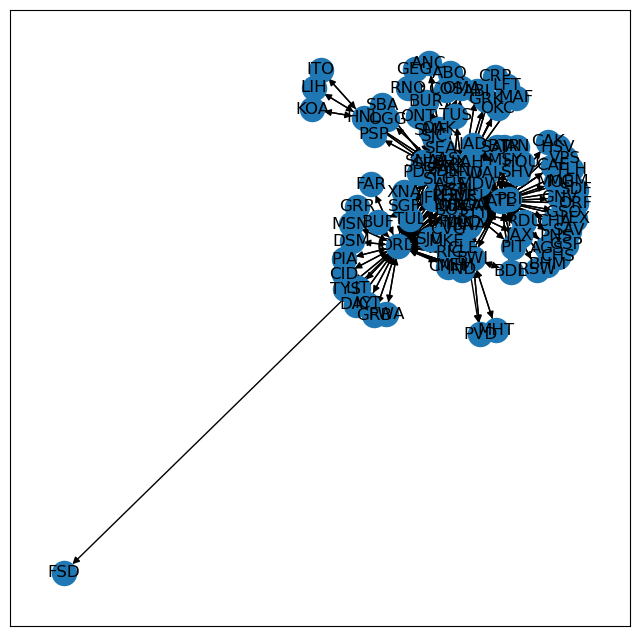

In [11]:

top = 140
df_between_airports = df_between_airports.head(top)
df_between_airports

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))

options = {
    'node_color':'yellow',
    'node_size': 1500,
    'width': 1,
    'arrowstyle': '-|>',
    'arrowsize': 18,
}

#nx.draw_circular(G, with_labels = True,  **options)
nx.draw_networkx(G, with_labels=True)


In [17]:

import pandas as pd
df_airports = pd.read_csv('C:\\Users\\airports.csv')
df_airports.head()

# check which airport does not have location information
df_airports[(df_airports['LATITUDE'].isna()==True) | (df_airports['LONGITUDE'].isna()==True)]


,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
96,ECP,Northwest Florida Beaches International Airport,Panama City,FL,USA,NaN,NaN
234,PBG,Plattsburgh International Airport,Plattsburgh,NY,USA,NaN,NaN
313,UST,Northeast Florida Regional Airport (St. August...,St. Augustine,FL,USA,NaN,NaN


In [18]:

#!pip install basemap
from mpl_toolkits.basemap import Basemap as Basemap
import matplotlib.pyplot as plt

plt.figure(figsize = (10,9))

basemap = Basemap(
    projection = 'merc',
    llcrnrlon = -180, 
    urcrnrlon = -50,     
    llcrnrlat = -10,  
    urcrnrlat = 70,    
    lat_ts = 0,
    resolution = 'l',
    suppress_ticks = True)


<Figure size 1000x900 with 0 Axes>

In [19]:

# pass in lon, lat to convert to x/y map projection coordinates
basemap_x, basemap_y = basemap(df_airports['LONGITUDE'].values, df_airports['LATITUDE'].values)


In [21]:

pos = {}
for i, IATA_CODE in enumerate (df_airports['IATA_CODE']):    
    pos[IATA_CODE] = (basemap_x[i], basemap_y[i])
    

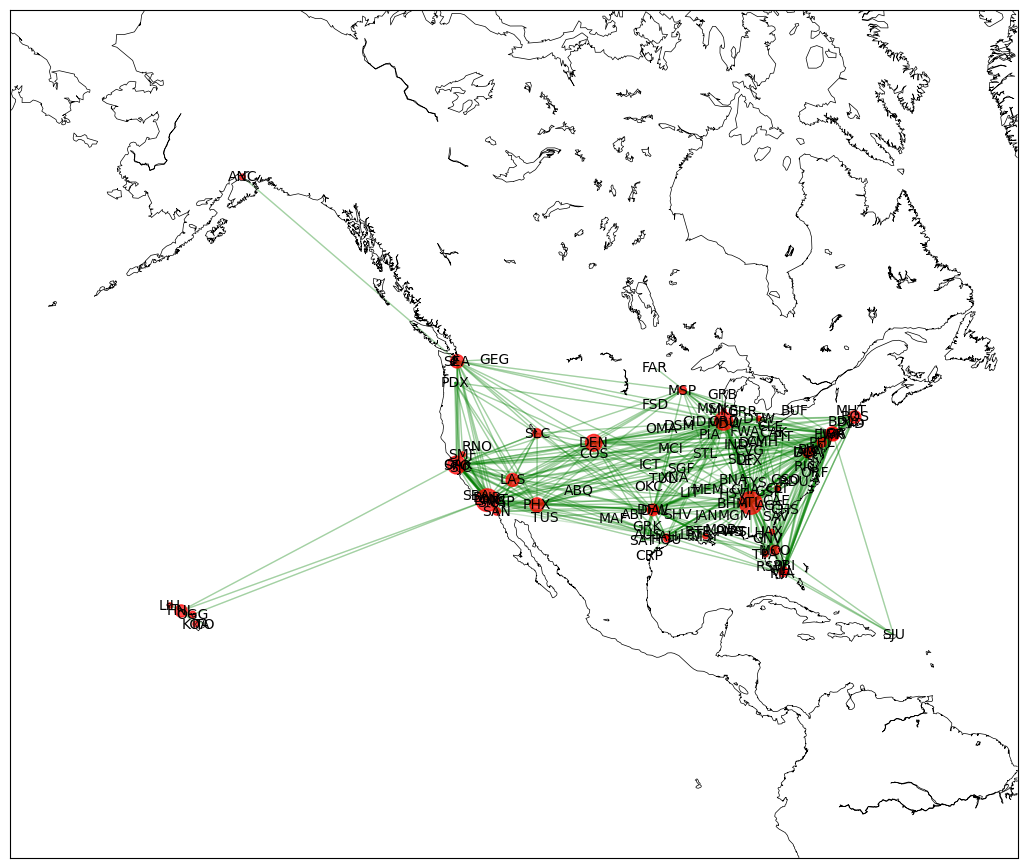

In [22]:

ax = plt.figure(figsize=(13, 13))

nx.draw_networkx_nodes(G = G, 
                       pos = pos, 
                       nodelist = G.nodes(), 
                       node_color = 'r', 
                       alpha = 0.7, 
                       node_size = [sum(df_between_airports.query(f'DESTINATION_AIRPORT == "{x}"')['COUNT']) / 400 for x in G.nodes()]
                       )

nx.draw_networkx_labels(G = G, 
                       pos = pos,
                       labels =  {x:x for x in G.nodes()},
                       font_size = 10
                       )

nx.draw_networkx_edges(G = G, 
                       pos = pos, 
                       edge_color='g',
                       alpha=0.2, 
                       arrows = False)

basemap.drawcoastlines(linewidth = 0.5)


In [23]:

basemap = Basemap(projection='ortho',
                  lon_0 = -105,
                  lat_0 = 40,
                  resolution = 'l')


In [25]:

import matplotlib.pyplot as plt
import mplleaflet
import networkx as nx

# load the nodes and edges
G = nx.from_pandas_edgelist(df_between_airports, 
                            'ORIGIN_AIRPORT', 
                            'DESTINATION_AIRPORT')

# create a dictionary of this format: { IATA_CODE: [LONGITUDE, LATITUDE] }
pos = df_airports[['IATA_CODE','LONGITUDE','LATITUDE']].set_index('IATA_CODE').T.to_dict('list')


In [46]:

plt.figure(figsize = (10,9))

m = Basemap(
     projection='merc',
     llcrnrlon=-180,
     llcrnrlat=10,
     urcrnrlon=-50,
     urcrnrlat=70,
     lat_ts=0,
     resolution='l',
     suppress_ticks=True)


mx, my = m(df_airports['LONGITUDE'].values, df_airports['LATITUDE'].values)

pos = {}
for count, elem in enumerate (df_airports['IATA_CODE']):
  pos[elem] = (mx[count], my[count])



<Figure size 1000x900 with 0 Axes>

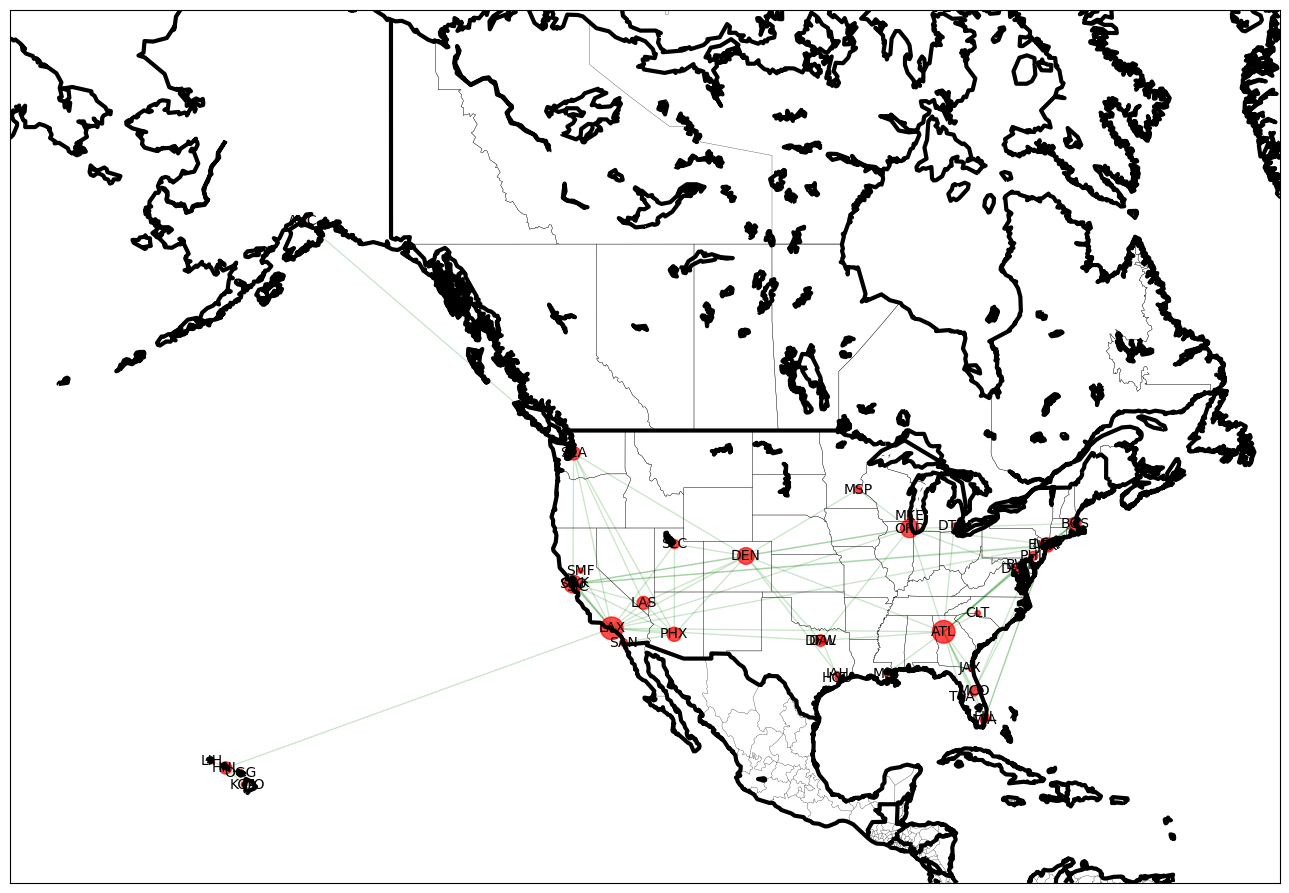

In [48]:

ax = plt.figure(figsize=(13, 13))

nx.draw_networkx_nodes(G = G, 
                       pos = pos, 
                       nodelist = G.nodes(), 
                       node_color = 'r', 
                       alpha = 0.7, 
                       node_size = [sum(df_between_airports.query(f'DESTINATION_AIRPORT == "{x}"')['COUNT']) / 400 for x in G.nodes()]
                       )

nx.draw_networkx_labels(G = G, 
                       pos = pos,
                       labels =  {x:x for x in G.nodes()},
                       font_size = 10
                       )

nx.draw_networkx_edges(G = G, 
                       pos = pos, 
                       edge_color='g',
                       alpha=0.2, 
                       arrows = False)



m.drawcountries(linewidth = 3)
m.drawstates(linewidth = 0.2)
m.drawcoastlines(linewidth=3)
plt.tight_layout()
plt.show()
